In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import wordcloud
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

In [2]:
# Importing the dataset
pd.set_option('display.max_columns', None)
churn_data = pd.read_excel("../data/raw-data/CustomerChurn.xlsx")
churn_data.head()

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Checking the shape of dataset
churn_data.shape

(7043, 21)

In [4]:
# Looking the dataset column information
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoyaltyID          7043 non-null   int64  
 1   Customer ID        7043 non-null   object 
 2   Senior Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure             7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless Billing  7043 

In [5]:
# Checking for missing values in our dataset
print(churn_data.isnull().sum()/len(churn_data)*100)

LoyaltyID            0.0
Customer ID          0.0
Senior Citizen       0.0
Partner              0.0
Dependents           0.0
Tenure               0.0
Phone Service        0.0
Multiple Lines       0.0
Internet Service     0.0
Online Security      0.0
Online Backup        0.0
Device Protection    0.0
Tech Support         0.0
Streaming TV         0.0
Streaming Movies     0.0
Contract             0.0
Paperless Billing    0.0
Payment Method       0.0
Monthly Charges      0.0
Total Charges        0.0
Churn                0.0
dtype: float64


In [6]:
# Checking for number of samples for churn value (0/1)
churn_data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [7]:
# Checking the different values for numerical attributes
churn_data.describe()

,LoyaltyID,Tenure,Monthly Charges
count,7043.000000,7043.000000,7043.000000
mean,550382.651001,32.371149,64.761692
std,260776.118690,24.559481,30.090047
min,100346.000000,0.000000,18.250000
25%,323604.500000,9.000000,35.500000
50%,548704.000000,29.000000,70.350000
75%,776869.000000,55.000000,89.850000
max,999912.000000,72.000000,118.750000


In [8]:
# Creating a copy of our main data to work with
churn_df = churn_data.copy(deep=True)

In [9]:
# It seems that there's some issue with the Total charges column. 
# Let's forcefully convert it to float and replace non-numeric with NaN
churn_df["Total Charges"] = pd.to_numeric(churn_df["Total Charges"], errors='coerce')
churn_df["Total Charges"].isnull().sum()

11

In [10]:
# Let's check out these rows with missing total charges value
churn_df[churn_df["Total Charges"].isnull()][["Customer ID","Monthly Charges", "Total Charges", "Churn"]][:5]

,Customer ID,Monthly Charges,Total Charges
488,4472-LVYGI,52.55,NaN
753,3115-CZMZD,20.25,NaN
936,5709-LVOEQ,80.85,NaN
1082,4367-NUYAO,25.75,NaN
1340,1371-DWPAZ,56.05,NaN


In [11]:
# Now, let's check what the reason we are not able to convert these values to float
churn_data[churn_df["Total Charges"].isnull()][["Customer ID", "Monthly Charges","Total Charges", "Churn"]][:5]

,Customer ID,Monthly Charges,Total Charges
488,4472-LVYGI,52.55,
753,3115-CZMZD,20.25,
936,5709-LVOEQ,80.85,
1082,4367-NUYAO,25.75,
1340,1371-DWPAZ,56.05,


In [12]:
# It seems that we have missing values, Let's drop them
churn_df.dropna(inplace=True)
churn_df["Total Charges"].isnull().sum()

0

In [13]:
# Dropping Loyalty ID and customer ID columns for now
churn_df.drop(["LoyaltyID", "Customer ID"], axis=1, inplace=True)
churn_df.head()

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
# Making a list of categorical and numerical attributes
num_attributes = ["Tenure", "Monthly Charges", "Total Charges"]
cat_attributes = [column for column in churn_df.columns if not column in num_attributes]
print(cat_attributes)

['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn']


In [15]:
# Converting the dtypes of columns respectively
churn_df[cat_attributes] = churn_df[cat_attributes].astype('category')
churn_df[num_attributes] = churn_df[num_attributes].astype(np.float64)
churn_df.dtypes

Senior Citizen       category
Partner              category
Dependents           category
Tenure                float64
Phone Service        category
Multiple Lines       category
Internet Service     category
Online Security      category
Online Backup        category
Device Protection    category
Tech Support         category
Streaming TV         category
Streaming Movies     category
Contract             category
Paperless Billing    category
Payment Method       category
Monthly Charges       float64
Total Charges         float64
Churn                category
dtype: object

In [16]:
# Saving the cleaned dataset
churn_df.to_csv("../data/cleaned-data/customer-churn-cleaned.csv", index=False)

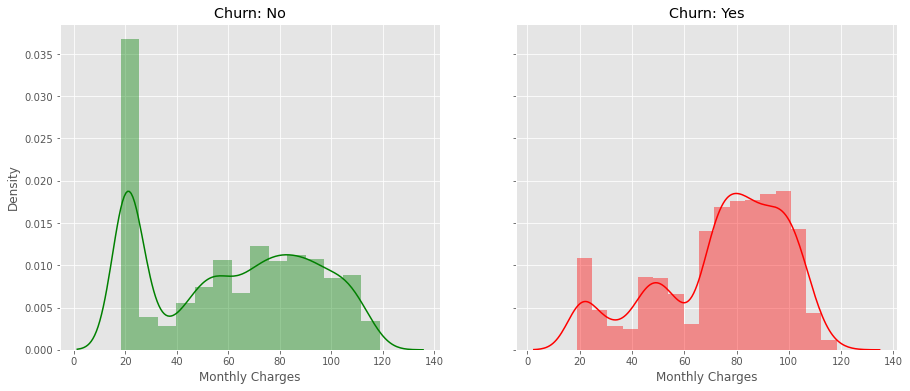

In [55]:
# plotting a distplot to see the distribution of monthly bill among all customers
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
sns.distplot(ax=axes[0], a=churn_df[churn_df["Churn"]=="No"]["Monthly Charges"], color = "green")
axes[0].set_title("Churn: No")
sns.distplot(ax=axes[1], a=churn_df[churn_df["Churn"]=="Yes"]["Monthly Charges"], color = "red")
axes[1].set_title("Churn: Yes")
plt.show()

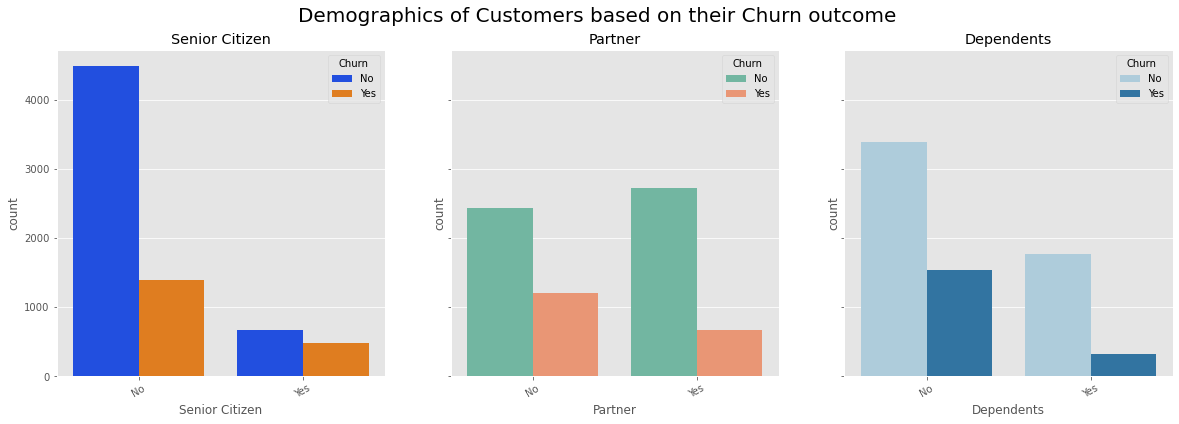

In [61]:
# Plotting the demographics of customers to get an overview
fig, axes = plt.subplots(1, 3, figsize = (20, 6), sharey= True)
fig.suptitle('Demographics of Customers based on their Churn outcome', fontsize = 20)

# Senior Citizen
sns.countplot(ax=axes[0], x='Senior Citizen', data=churn_df, hue='Churn', palette='bright')
axes[0].set_title('Senior Citizen')
axes[0].tick_params(axis = 'x', rotation=30, labelsize = 'medium')

# Partner
sns.countplot(ax=axes[1], x='Partner',  data=churn_df, hue='Churn', palette='Set2')
axes[1].set_title('Partner')
axes[1].tick_params(axis = 'x', rotation=30, labelsize = 'medium')

# Senior Citizen
sns.countplot(ax=axes[2], x='Dependents', data=churn_df, hue='Churn', palette='Paired')
axes[2].set_title('Dependents')
axes[2].tick_params(axis = 'x', rotation=30, labelsize = 'medium')